https://www.kaggle.com/ruchi798/malnutrition-across-the-globe

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [78]:
plt.style.use('seaborn')
f = 3

SMALL_SIZE = 8*f
MEDIUM_SIZE = 10*f
BIGGER_SIZE = 12*f

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(15, 10))
plt.rc('legend', frameon=True)
plt.rc('legend', facecolor='white')

# Препроцессинг и предварительный осмотр данных

In [79]:
data = pd.read_csv("malnutrition-estimates.csv")

In [80]:
data

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,ZWE,ZIMBABWE,2009,2009,1,0.0,1.0,1.0,"6,196",0.5,2.4,3.5,35.1,11.7,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279
920,920,ZWE,ZIMBABWE,2010-11,2010,1,0.0,1.0,1.0,"5,414",0.8,3.2,5.8,32.2,10.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281
921,921,ZWE,ZIMBABWE,2014,2014,1,0.0,1.0,1.0,"9,591",0.7,3.2,3.6,27.6,11.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182
922,922,ZWE,ZIMBABWE,2015,2015,1,0.0,1.0,1.0,"6,380",1.1,3.3,5.6,27.1,8.5,NaN,Zimbabwe National Statistics Agency; ICF Inter...,"Zimbabwe Demographic and Health Survey 2015, N...",DHS,2258.788


LDC = Least Developed Countries

LIFD = Low Income Food Deficient

LLDC = Landlocked Developing Countries

SID = Small Island Developing

Drop 'Notes', 'Report Author', 'Source', 'Short Source', 'Survey Year', 'Survey Sample (N)' (?), 'Unnamed: 0'

Перевести ["Underweight", "Wasting", "Severe Wasting", "Stunting", "Overweight", "Income Classification", "U5"]

In [81]:
# Проверка на непротиворечивость данных
data.groupby('Country')['LDC'].mean().value_counts()

0.0    105
1.0     47
Name: LDC, dtype: int64

In [82]:
# Проверка на непротиворечивость данных
data.groupby('Country')['LIFD'].mean().value_counts()

0.0    101
1.0     51
Name: LIFD, dtype: int64

In [83]:
# Проверка на непротиворечивость данных
data.groupby('Country')['LLDC or SID2'].mean().value_counts()

0.0    91
1.0    32
2.0    29
Name: LLDC or SID2, dtype: int64

In [84]:
data['Страна'] = data['Country']
data['Группа уровня дохода'] = data['Income Classification']
data['Наименее развитые страны'] = data['LDC']
data['Низкий доход/недостаток пищи в стране'] = data['LIFD']
data['Неразвитая страна без выхода к морю'] = (data['LLDC or SID2'] == 1.0).astype('int64')
data['Неразвитая страна на малом острове'] = (data['LLDC or SID2'] == 2.0).astype('int64')
data['Год'] = data['Year']
data['Количество исследований'] = data['Страна'].map(data.groupby('Страна').size())

data['Недовес'] = data['Underweight']
data['Истощение'] = data['Wasting']
data['Сильное истощение'] = data['Severe Wasting']
data['Низкорослость'] = data['Stunting']
data['Избыток веса'] = data['Overweight']

#data['Количество детей'] = data["U5 Population ('000s)"] * 1000

data = data.drop(columns=["Year", "LDC", "LIFD", "LLDC or SID2"], errors='ignore')
data = data.drop(columns=["Underweight", "Wasting", "Severe Wasting", "Stunting", "Overweight"], errors='ignore')
data = data.drop(columns=["Income Classification", "U5 Population ('000s)", "Country"])
data = data.drop(columns=['Notes', 'Report Author', 'Source', 'Short Source', 'Survey Year', 'Survey Sample (N)', 'LLDC or SID2', 'Unnamed: 0'], errors='ignore')

In [85]:
data.dtypes

ISO code                                  object
Страна                                    object
Группа уровня дохода                       int64
Наименее развитые страны                 float64
Низкий доход/недостаток пищи в стране    float64
Неразвитая страна без выхода к морю        int64
Неразвитая страна на малом острове         int64
Год                                        int64
Количество исследований                    int64
Недовес                                  float64
Истощение                                float64
Сильное истощение                        float64
Низкорослость                            float64
Избыток веса                             float64
dtype: object

In [86]:
data

,ISO code,Страна,Группа уровня дохода,Наименее развитые страны,Низкий доход/недостаток пищи в стране,Неразвитая страна без выхода к морю,Неразвитая страна на малом острове,Год,Количество исследований,Недовес,Истощение,Сильное истощение,Низкорослость,Избыток веса
0,AFG,AFGHANISTAN,0,1.0,1.0,1,0,1997,4,44.9,18.2,NaN,53.2,6.5
1,AFG,AFGHANISTAN,0,1.0,1.0,1,0,2004,4,32.9,8.6,3.5,59.3,4.6
2,AFG,AFGHANISTAN,0,1.0,1.0,1,0,2013,4,24.6,9.5,4.0,40.4,5.3
3,AFG,AFGHANISTAN,0,1.0,1.0,1,0,2018,4,19.1,5.1,1.6,38.2,4.1
4,ALB,ALBANIA,2,0.0,0.0,0,0,1997,5,7.1,8.1,NaN,20.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,ZWE,ZIMBABWE,1,0.0,1.0,1,0,2009,10,11.7,2.4,0.5,35.1,3.5
920,ZWE,ZIMBABWE,1,0.0,1.0,1,0,2010,10,10.2,3.2,0.8,32.2,5.8
921,ZWE,ZIMBABWE,1,0.0,1.0,1,0,2014,10,11.2,3.2,0.7,27.6,3.6
922,ZWE,ZIMBABWE,1,0.0,1.0,1,0,2015,10,8.5,3.3,1.1,27.1,5.6


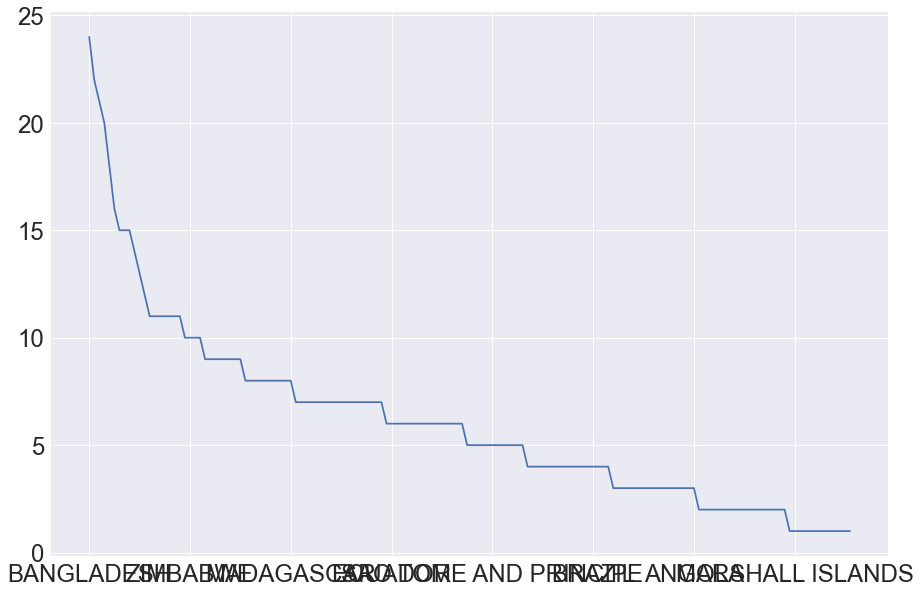

In [87]:
data.Страна.value_counts().plot()

In [88]:
data.Страна.value_counts()

BANGLADESH                            24
VIET NAM                              22
VENEZUELA (BOLIVARIAN REPUBLIC OF)    21
JAMAICA                               20
KUWAIT                                18
                                      ..
JAPAN                                  1
NAURU                                  1
BELARUS                                1
CANADA                                 1
TUVALU                                 1
Name: Страна, Length: 152, dtype: int64

In [89]:
data.isna().mean()[data.isna().mean() > 0]

Недовес              0.023810
Истощение            0.050866
Сильное истощение    0.246753
Низкорослость        0.040043
Избыток веса         0.147186
dtype: float64

In [90]:
t = pd.DataFrame(data.notna().mean()[data.isna().mean() > 0])
t.columns = ['Процент в исследованиях']
t

,Процент в исследованиях
Недовес,0.976190
Истощение,0.949134
Сильное истощение,0.753247
Низкорослость,0.959957
Избыток веса,0.852814


In [91]:
data.isna().groupby(data.Страна).mean()[["Недовес", "Истощение", "Сильное истощение", "Низкорослость", "Избыток веса"]]

,Недовес,Истощение,Сильное истощение,Низкорослость,Избыток веса
Страна,,,,,
AFGHANISTAN,0.000,0.000000,0.250000,0.0,0.000000
ALBANIA,0.000,0.000000,0.200000,0.0,0.000000
ALGERIA,0.000,0.000000,0.142857,0.0,0.142857
ANGOLA,0.000,0.000000,0.000000,0.0,0.333333
ARGENTINA,0.000,0.000000,0.750000,0.0,0.000000
...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),0.000,0.000000,1.000000,0.0,0.000000
VIET NAM,0.000,0.045455,0.272727,0.0,0.227273
YEMEN,0.000,0.000000,0.142857,0.0,0.000000


In [92]:
data.describe()

,Группа уровня дохода,Наименее развитые страны,Низкий доход/недостаток пищи в стране,Неразвитая страна без выхода к морю,Неразвитая страна на малом острове,Год,Количество исследований,Недовес,Истощение,Сильное истощение,Низкорослость,Избыток веса
count,924.00000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,902.000000,877.000000,696.000000,887.000000,788.000000
mean,1.24026,0.349567,0.424242,0.232684,0.111472,2003.730519,9.164502,15.841242,6.955644,2.191523,29.063134,6.434772
std,0.92202,0.477091,0.494495,0.422771,0.314886,8.792535,5.503175,12.509643,5.039402,1.912586,15.834657,4.638849
min,0.00000,0.000000,0.000000,0.000000,0.000000,1983.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,1996.000000,6.000000,4.925000,2.900000,0.800000,16.650000,2.900000
50%,1.00000,0.000000,0.000000,0.000000,0.000000,2004.500000,8.000000,13.400000,5.900000,1.600000,29.200000,5.500000
75%,2.00000,1.000000,1.000000,0.000000,0.000000,2011.000000,11.000000,23.100000,9.700000,2.900000,40.200000,8.700000
max,3.00000,1.000000,1.000000,1.000000,1.000000,2019.000000,24.000000,66.800000,25.300000,12.900000,73.600000,30.100000


Признаки: ["Группа уровня дохода", "Наименее развитые страны", "Низкий доход/недостаток пищи в стране", "Неразвитая страна без выхода к морю", "Неразвитая страна на малом острове", "Количество исследований"]

Год -- изменяемый косвенный признак

Таргеты: ["Недовес", "Истощение", "Сильное истощение", "Низкорослость", "Избыток веса"]

Отдельный признак от года -- количество детей

. Распределения таргетов +

. Pairplot таргетов +

. Датафрейм коэффициентов корреляции для признаков и таргетов +

. Хитмеп коэффициентов корреляции + 

Построить heatmap'ы по карте мира:

. Количества исследований +

. Неизменяемых признаков +

. Таргетов +

. Количество детей?

Года:

. График количества исследований разных таргетов по годам +    

Найти пики + 

. барплот признаков по годам

Порядок для определённости:  ["Недовес", "Истощение", "Сильное истощение", "Низкорослость", "Избыток веса"]

sns.histplot(data.groupby('Страна')['Количество детей'].describe()['mean'], stat='density')
plt.suptitle('Плотность количества детей')

(data.groupby('Страна')['Количество детей'].describe()['std'] / data.groupby('Страна')['Количество детей'].describe()['mean']).describe()

# Распределения признаков

Text(0.5, 0.98, 'Плотность распределения недовеса')

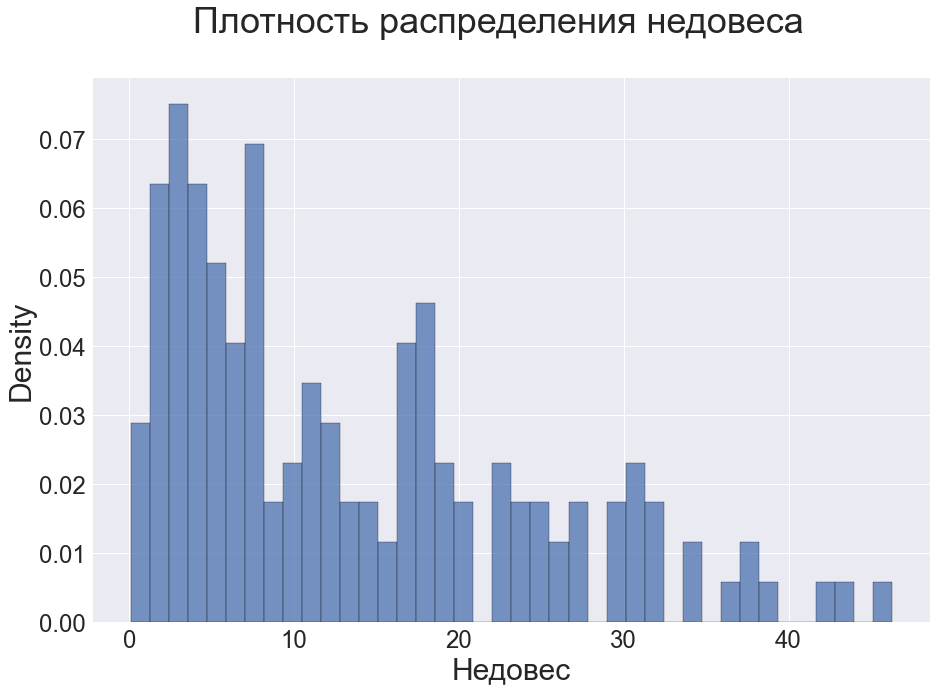

In [93]:
sns.histplot(data.groupby('Страна')['Недовес'].mean(), bins=40, stat='density')
plt.suptitle('Плотность распределения недовеса')

Text(0.5, 0.98, 'Плотность распределения истощения')

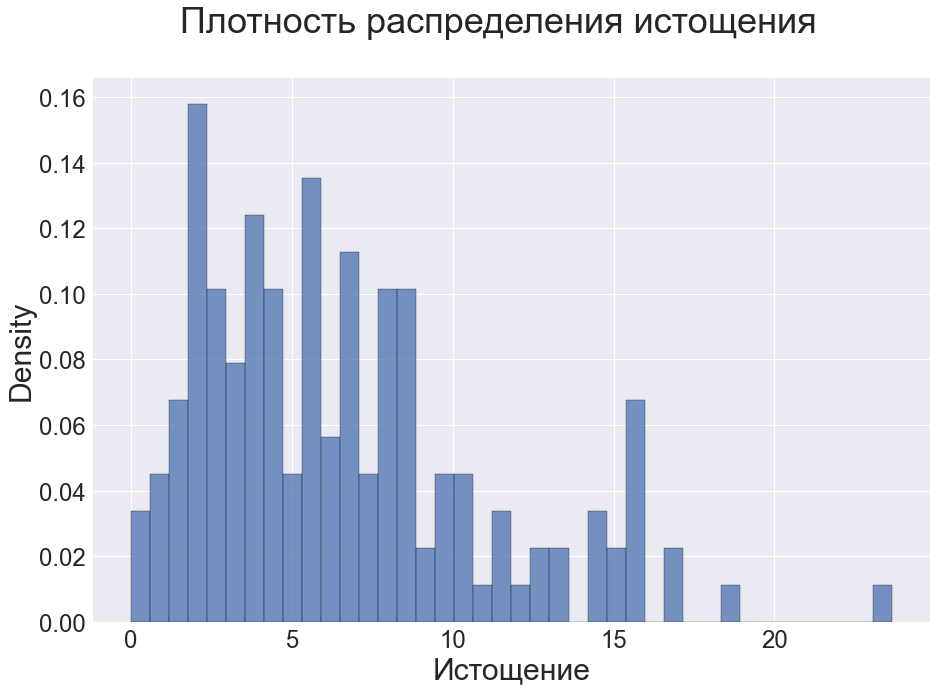

In [94]:
sns.histplot(data.groupby('Страна')['Истощение'].mean(), bins=40, stat='density')
plt.suptitle('Плотность распределения истощения')

Text(0.5, 0.98, 'Плотность распределения сильного истощения')

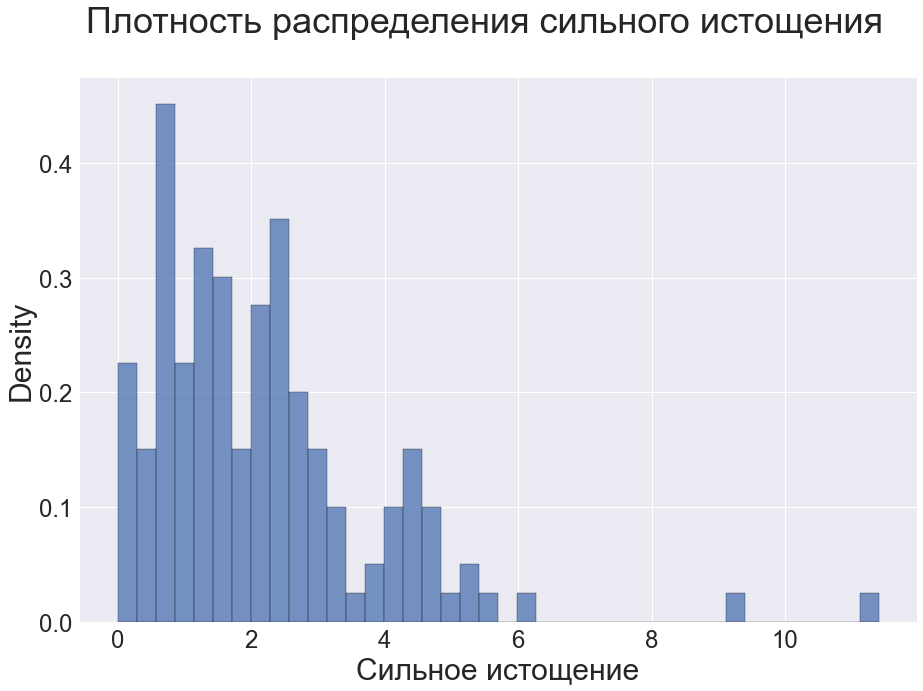

In [95]:
sns.histplot(data.groupby('Страна')['Сильное истощение'].mean(), bins=40, stat='density')
plt.suptitle('Плотность распределения сильного истощения')

Text(0.5, 0.98, 'Плотность распределения низкорослости')

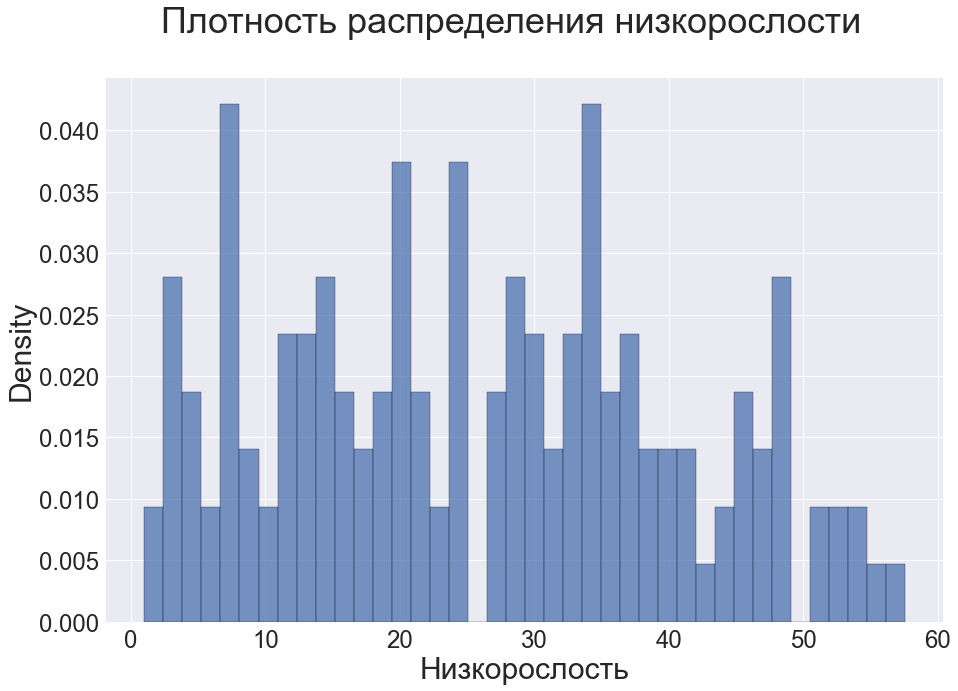

In [96]:
sns.histplot(data.groupby('Страна')['Низкорослость'].mean(), bins=40, stat='density')
plt.suptitle('Плотность распределения низкорослости')

Text(0.5, 0.98, 'Плотность распределения избытка веса')

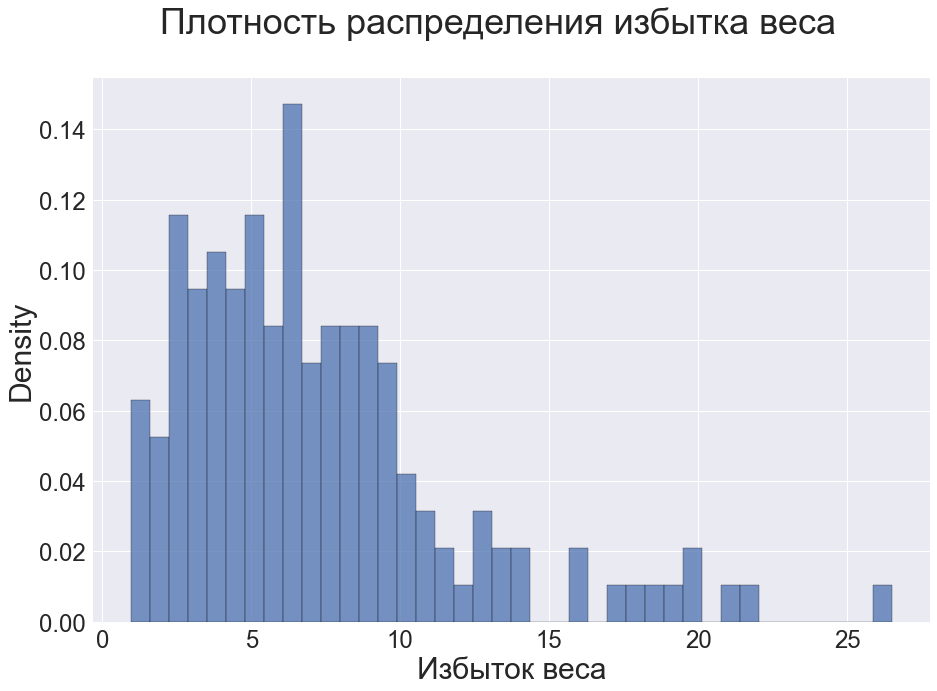

In [97]:
sns.histplot(data.groupby('Страна')['Избыток веса'].mean(), bins=40, stat='density')
plt.suptitle('Плотность распределения избытка веса')

# Графики количества исследований конкретного признака по годам

In [98]:
data_surveys = data[["Недовес", "Истощение", "Сильное истощение", "Низкорослость", "Избыток веса"]].notna().astype('int32')
data_surveys["Год"] = data["Год"]
data_surveys

,Недовес,Истощение,Сильное истощение,Низкорослость,Избыток веса,Год
0,1,1,0,1,1,1997
1,1,1,1,1,1,2004
2,1,1,1,1,1,2013
3,1,1,1,1,1,2018
4,1,1,0,1,1,1997
...,...,...,...,...,...,...
919,1,1,1,1,1,2009
920,1,1,1,1,1,2010
921,1,1,1,1,1,2014
922,1,1,1,1,1,2015


Text(0.5, 0.98, 'Динамика количества исследований проблем питания')

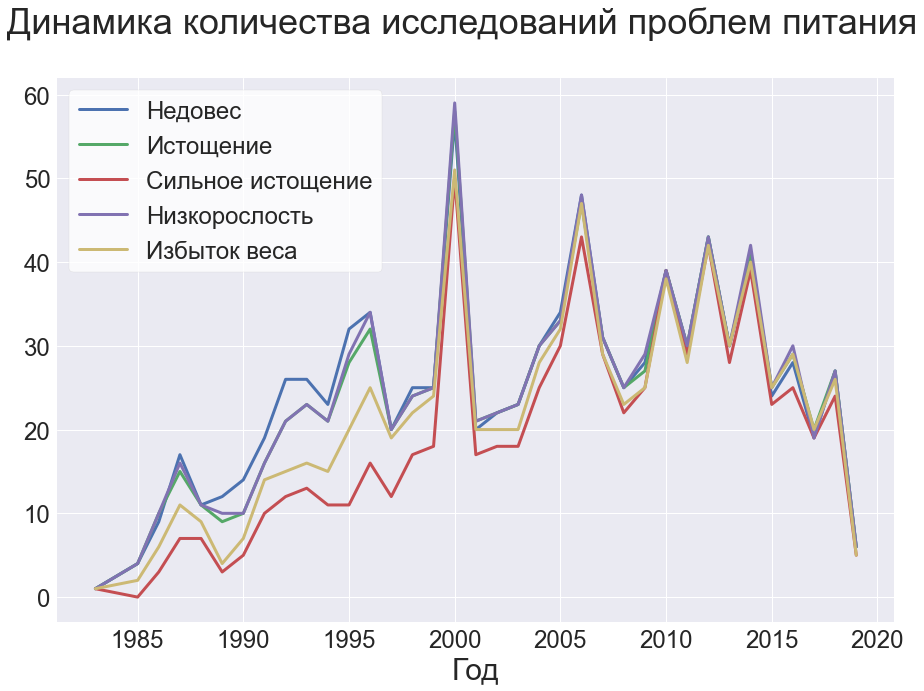

In [99]:
data_surveys.groupby(data['Год'])[["Недовес", "Истощение", "Сильное истощение", "Низкорослость", "Избыток веса"]].sum().plot(lw=3)
plt.suptitle('Динамика количества исследований проблем питания')

# Pairplot таргетов

In [100]:
features = ["Группа уровня дохода", "Наименее развитые страны", 
            "Низкий доход/недостаток пищи в стране", "Неразвитая страна без выхода к морю", 
            "Неразвитая страна на малом острове", "Количество исследований"]

targets = ['Недовес', 'Истощение',
       'Сильное истощение', 'Низкорослость', 
           'Избыток веса']

Text(0.5, 0.98, 'Попарные отношения исследуемых переменных')

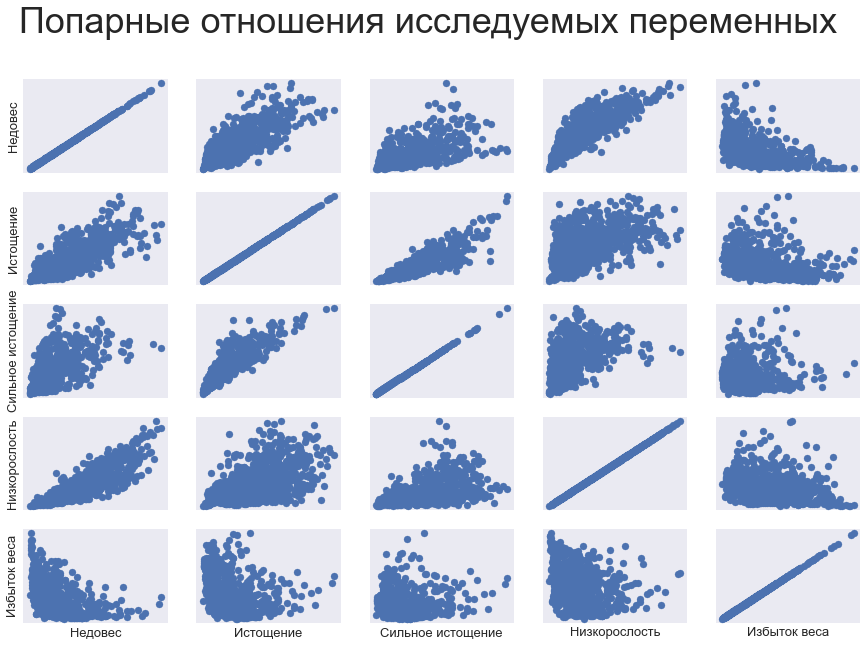

In [101]:
n = len(targets)
fig, axs = plt.subplots(n, n)
for i in range(n):
    for j in range(n):
        if i == n - 1:
            axs[i, j].set_xlabel(targets[j], fontsize=13)
        if j == 0:
            axs[i, j].set_ylabel(targets[i], fontsize=13)
        axs[i, j].scatter(data[targets[i]], data[targets[j]])
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
fig.suptitle('Попарные отношения исследуемых переменных')

In [102]:
for_corr = features + ['Год'] + targets# + ['Количество детей']
corrs = data[for_corr].corr()
corrs

,Группа уровня дохода,Наименее развитые страны,Низкий доход/недостаток пищи в стране,Неразвитая страна без выхода к морю,Неразвитая страна на малом острове,Количество исследований,Год,Недовес,Истощение,Сильное истощение,Низкорослость,Избыток веса
Группа уровня дохода,1.000000,-0.683725,-0.758462,-0.377043,0.142749,-0.010360,-0.107204,-0.561489,-0.435153,-0.355215,-0.681500,0.342182
Наименее развитые страны,-0.683725,1.000000,0.633605,0.283844,-0.021674,0.008610,0.114943,0.563700,0.428380,0.315934,0.578219,-0.387212
Низкий доход/недостаток пищи в стране,-0.758462,0.633605,1.000000,0.252838,-0.150967,0.131189,0.135217,0.494833,0.421143,0.301923,0.527837,-0.378295
Неразвитая страна без выхода к морю,-0.377043,0.283844,0.252838,1.000000,-0.195049,-0.094703,0.115400,0.089462,0.038563,0.051754,0.247427,-0.035736
Неразвитая страна на малом острове,0.142749,-0.021674,-0.150967,-0.195049,1.000000,-0.128135,-0.072098,-0.112252,-0.029107,-0.044127,-0.180534,-0.009234
Количество исследований,-0.010360,0.008610,0.131189,-0.094703,-0.128135,1.000000,-0.020018,0.172863,0.048629,-0.039616,0.082131,-0.231456
Год,-0.107204,0.114943,0.135217,0.115400,-0.072098,-0.020018,1.000000,-0.182488,-0.144213,-0.122289,-0.239904,-0.003272
Недовес,-0.561489,0.563700,0.494833,0.089462,-0.112252,0.172863,-0.182488,1.000000,0.812625,0.612175,0.851907,-0.481794
Истощение,-0.435153,0.428380,0.421143,0.038563,-0.029107,0.048629,-0.144213,0.812625,1.000000,0.881917,0.566387,-0.273627
Сильное истощение,-0.355215,0.315934,0.301923,0.051754,-0.044127,-0.039616,-0.122289,0.612175,0.881917,1.000000,0.453934,0.042732


In [103]:
for_corr

['Группа уровня дохода',
 'Наименее развитые страны',
 'Низкий доход/недостаток пищи в стране',
 'Неразвитая страна без выхода к морю',
 'Неразвитая страна на малом острове',
 'Количество исследований',
 'Год',
 'Недовес',
 'Истощение',
 'Сильное истощение',
 'Низкорослость',
 'Избыток веса']

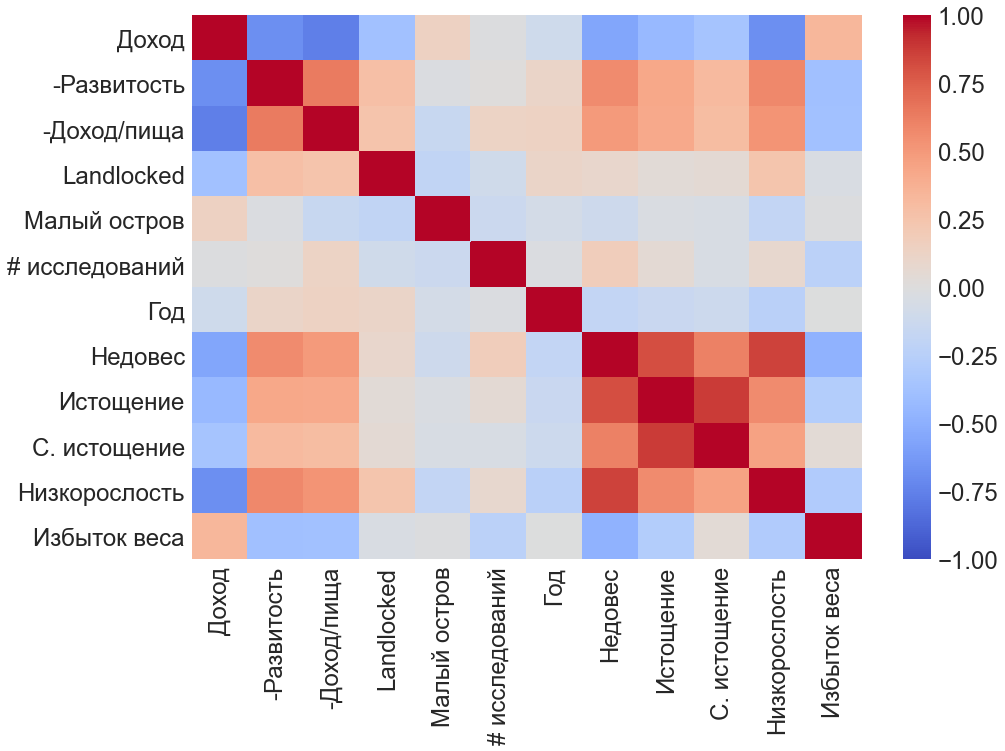

In [104]:
short_names = ['Доход', '-Развитость', '-Доход/пища', 'Landlocked', 'Малый остров', '# исследований', 'Год', 'Недовес', 'Истощение', 'С. истощение', 'Низкорослость', 'Избыток веса']
sns.heatmap(corrs, vmin=-1, vmax=1, cmap='coolwarm', yticklabels=short_names, xticklabels=short_names)
#plt.yticks(rotation=45) 
#plt.xticks(np.arange(len(for_corr)), rotation=45) 

# Карты мира

## Таргеты

In [105]:
targets

['Недовес', 'Истощение', 'Сильное истощение', 'Низкорослость', 'Избыток веса']

In [107]:
import plotly

In [109]:
x = data.groupby(["Страна"])["Недовес"].mean()
datamap = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Reds',
            text= x.index,
            z=x,
            colorbar = {'title':'Дети с недовесом, %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Распространённость недовеса в мире")
col_map = go.Figure(data = [datamap],layout = layout)
col_map.show()

In [110]:
x = data.groupby(["Страна"])["Истощение"].mean()
datamap = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Reds',
            text= x.index,
            z=x,
            colorbar = {'title':'Дети с истощением, %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Распространённость истощения в мире")
col_map = go.Figure(data = [datamap],layout = layout)
col_map.show()

In [111]:
x = data.groupby(["Страна"])["Сильное истощение"].mean()
datamap = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Reds',
            text= x.index,
            z=x,
            colorbar = {'title':'Дети с сильным истощением, %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Распространённость сильного истощения в мире")
col_map = go.Figure(data = [datamap],layout = layout)
col_map.show()

In [112]:
x = data.groupby(["Страна"])["Низкорослость"].mean()
datamap = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Reds',
            text= x.index,
            z=x,
            colorbar = {'title':'Дети с низкорослостью, %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Распространённость низкорослости в мире")
col_map = go.Figure(data = [datamap],layout = layout)
col_map.show()

In [113]:
x = data.groupby(["Страна"])["Избыток веса"].mean()
datamap = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Reds',
            text= x.index,
            z=x,
            colorbar = {'title':'Дети с избыточным весом, %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Распространённость избыточности веса в мире")
col_map = go.Figure(data = [datamap],layout = layout)
col_map.show()

## Признаки

In [114]:
features

['Группа уровня дохода',
 'Наименее развитые страны',
 'Низкий доход/недостаток пищи в стране',
 'Неразвитая страна без выхода к морю',
 'Неразвитая страна на малом острове',
 'Количество исследований']

In [115]:
import plotly.express as px

In [122]:
fig = px.choropleth(locations=data['Страна'], 
                    locationmode="country names",
                    #color='Группа уровня дохода',
                    data_frame=data,
                    color=data["Группа уровня дохода"].astype('str'),
                    color_discrete_map={'0':'red',
                                        '1':'orange',
                                        '2':'yellow',
                                        '3':'green'},
                    scope="world",
                    title="Уровни дохода стран мира"
                    #legend_title = 'Группа уровня дохода'
                   )
fig.show()

In [117]:
fig = px.choropleth(locations=data['Страна'], 
                    locationmode="country names",
                    #color='Группа уровня дохода',
                    data_frame=data,
                    color=data["Наименее развитые страны"].astype('int').astype('str'),
                    color_discrete_map={'0':'green',
                                        '1':'red'},
                    scope="world",
                    title="Наименее развитые страны"
                    #legend_title = 'Группа уровня дохода'
                   )
fig.show()

In [118]:
fig = px.choropleth(locations=data['Страна'], 
                    locationmode="country names",
                    #color='Группа уровня дохода',
                    data_frame=data,
                    color=data["Низкий доход/недостаток пищи в стране"].astype('int').astype('str'),
                    color_discrete_map={'0':'green',
                                        '1':'red'},
                    scope="world",
                    title="Страны с низким доходом или недостатком пищи"
                    #legend_title = 'Группа уровня дохода'
                   )
fig.show()

In [119]:
fig = px.choropleth(locations=data['Страна'], 
                    locationmode="country names",
                    #color='Группа уровня дохода',
                    data_frame=data,
                    color=data["Неразвитая страна без выхода к морю"].astype('int').astype('str'),
                    color_discrete_map={'0':'green',
                                        '1':'red'},
                    scope="world",
                    title="Неразвитые страны без выхода к морю"
                    #legend_title = 'Группа уровня дохода'
                   )
fig.show()

In [120]:
fig = px.choropleth(locations=data['Страна'], 
                    locationmode="country names",
                    #color='Группа уровня дохода',
                    data_frame=data,
                    color=data["Неразвитая страна на малом острове"].astype('int').astype('str'),
                    color_discrete_map={'0':'green',
                                        '1':'red'},
                    scope="world",
                    title="Неразвитые страны на малых островах"
                    #legend_title = 'Группа уровня дохода'
                   )
fig.show()

In [121]:
x = data.groupby(["Страна"]).size()
datamap = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Reds',
            text= x.index,
            z=x,
            colorbar = {'title':'Количество', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Количество исследований в разных странах мира")
col_map = go.Figure(data = [datamap],layout = layout)
col_map.show()